# Network Analytics Homework 2 - Programming 1

Group G: Joanna Andari, Karim Awad, Jiye Ren, Nirbhay Sharma, Qiuyue Zhang, Xiaoyan Zhou

1. (5 points) (You will get the data for this on 25 Nov 2017 8PM): The data collected will invariably be fraught with problems. We proceed nevertheless. Use built-in functions in NetworkX on the data HW2_ who_talks_to_whom.txt to do an organizational network analysis report (1 page max)---essentially calculating centrality measures (try at least one eigenvalue based one) and clustering coefficients and gaining some insight into the network. The objective for me (your client) is to identify who are the leaders and opinion-makers in your cohort.

This Jupyter notebook only contains the code that produces the elements (Graph, numbers, etc) included in the final report; for more detailed analysis please see the Network_Analytics_HW2_Programming_1_code_full.py file.

Several explanations for the following code:
1. As explained in the report, the raw data “Sent” and “Received” matrix are very similar - the number of conversation started by each side in a pair are quite balanced, which limited the information we could read from an unbalanced directed network. Thus we only use the averaged conversation data to analyse the social network as there is a length limit;
2. The graphs generated each time will be slightly different as we did not set random seeds for the layout. However the other characeristics will stay the same;
3. Some functions we used only works properly (as the way we use it in the following code) in some Python 3.X.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from functools import reduce
import collections
import seaborn as sns 

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
//anaconda/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
//anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/lib/python3.6

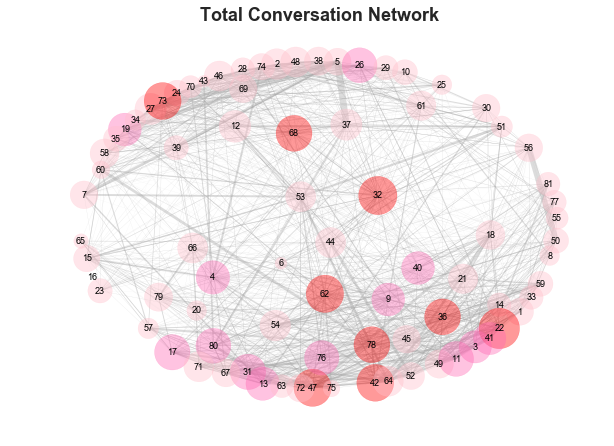

In [4]:
# Part 1: Data Cleaning & Drawing

avg_mat = pd.read_csv('./HW2_who_talks_to_whom_avg.csv')

# create node list
node_no_dict = {i:str(i+1) for i in list(range(81))}

avg_node_list = list()
for i in list(range(81)):
    for j in list(range(81)):
        if avg_mat.iloc[i, j] != 0:
            avg_node_list.append([node_no_dict[i], node_no_dict[j], avg_mat.iloc[i, j]])

# create DiGraph
G_total = nx.DiGraph()
G_total.add_weighted_edges_from(avg_node_list)

# draw the graphs
# total (weight > k)
k_total = 0

node_color_vec_total = dict()
for key in G_total.nodes():
    if len(G_total.neighbors(key)) >= np.percentile([len(G_total.neighbors(i)) for i in G_total.nodes()], 90):
        node_color_vec_total[key] = 'r'
    elif len(G_total.neighbors(key)) >= np.percentile([len(G_total.neighbors(i)) for i in G_total.nodes()], 75):
        node_color_vec_total[key] = 'hotpink'
    else:
        node_color_vec_total[key] = 'pink'

data_total = {'edgelist': [avg_node_list[i] for i in list(range(2057))],
              'tail': [avg_node_list[i][0] for i in list(range(2057))],
              'head': [avg_node_list[i][1] for i in list(range(2057))],
              'weight': [avg_node_list[i][2] for i in list(range(2057))],
              'num_neighbor': [len(G_total.neighbors(i[0])) for i in avg_node_list],
              'color': [node_color_vec_total[i[0]] for i in avg_node_list]}
node_attr_total = DataFrame(data_total)

node_attr_total_draw = DataFrame(columns = ['edgelist', 'tail', 'head', 'weight', 'num_neighbor', 'color'])
for i in list(range(2057)):
    if node_attr_total['weight'][i] > k_total:
        node_attr_total_draw = node_attr_total_draw.append(node_attr_total.loc[i], ignore_index=True)

nx.draw(G_total, 
        pos = nx.spring_layout(G_total, k = 0.6, iterations = 85, scale = 900),
        # pos = nx.random_layout(G_total),
        edgelist = list(node_attr_total_draw['edgelist']),
        with_labels = True,
        node_size = [(len(G_total.neighbors(i)) - 2) * 35 for i in G_total.nodes()],
        node_color = list(node_color_vec_total.values()),
        edge_color = 'darkgrey',
        width = [float(d['weight'] / 18 ) for (u, v, d) in G_total.edges(data = True)],
        alpha = 0.4,
        font_size = 9,
        arrows = False)
plt.title('Total Conversation Network',
          fontweight = "bold",
          fontsize = 18)
plt.show()

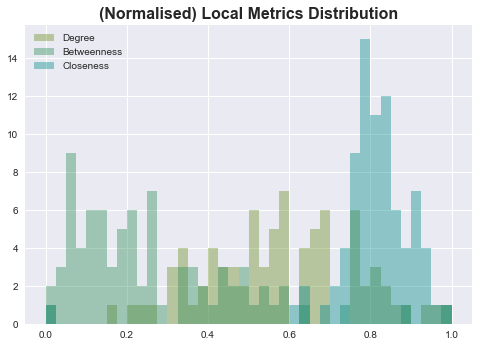

In [5]:
# Part 2: Network Analysis
# essentially calculating centrality measures (try at least one eigenvalue based one)
# degree centrality measure
degree_ctr_total = nx.degree_centrality(G_total)
in_degree_ctr_total = nx.in_degree_centrality(G_total)
out_degree_ctr_total = nx.out_degree_centrality(G_total)

DC_Counter = collections.Counter(degree_ctr_total)

# betweenness centrality measure
betweenness_nodes_ctr_total = nx.betweenness_centrality(G_total) # for nodes

BC_Counter = collections.Counter(betweenness_nodes_ctr_total)

# closeness centrality measure
closeness_ctr_total = nx.closeness_centrality(G_total)

CC_Counter = collections.Counter(closeness_ctr_total)

# Local metrics comparison
plt.hist([(value - min([value for key, value in DC_Counter.items()])) / (max([value for key, value in DC_Counter.items()]) - min([value for key, value in DC_Counter.items()])) for key, value in DC_Counter.items()], 
           bins = 40, 
           color = 'olivedrab',
           alpha = 0.4,
           histtype = "stepfilled",
           label = 'Degree')
plt.hist([(value - min([value for key, value in BC_Counter.items()])) / (max([value for key, value in BC_Counter.items()]) - min([value for key, value in BC_Counter.items()])) for key, value in BC_Counter.items()], 
           bins = 40, 
           color = 'seagreen',
           alpha = 0.4,
           histtype = "stepfilled", 
           label = 'Betweenness')
plt.hist([(value - min([value for key, value in CC_Counter.items()])) / (max([value for key, value in CC_Counter.items()]) - min([value for key, value in CC_Counter.items()])) for key, value in CC_Counter.items()], 
           bins = 40, 
           color = 'darkcyan', 
           alpha = 0.4,
           histtype = "stepfilled",
           label = 'Closeness')
plt.title('(Normalised) Local Metrics Distribution',
          fontweight="bold",
          fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()

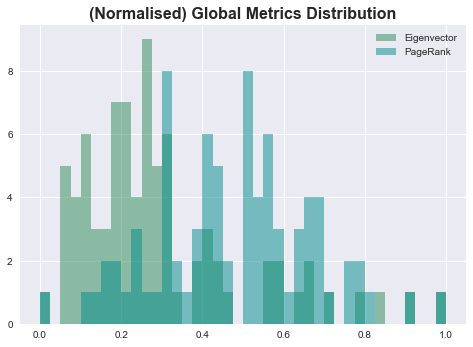

In [6]:
# eigenvector centrality measure
eigen_ctr_total = nx.eigenvector_centrality(G_total)

EC_Counter = collections.Counter(eigen_ctr_total)

# pangerank
pagerank_total = nx.pagerank(G_total)

pgrk_Counter = collections.Counter(pagerank_total)

# Global metrics comparison
plt.hist([(value - min([value for key, value in EC_Counter.items()])) / (max([value for key, value in EC_Counter.items()]) - min([value for key, value in EC_Counter.items()])) for key, value in EC_Counter.items()], 
           bins = 40, 
           color = 'seagreen',
           alpha = 0.5,
           histtype = "stepfilled",
           label = 'Eigenvector')
plt.hist([(value - min([value for key, value in pgrk_Counter.items()])) / (max([value for key, value in pgrk_Counter.items()]) - min([value for key, value in pgrk_Counter.items()])) for key, value in pgrk_Counter.items()], 
           bins = 40, 
           color = 'darkcyan', 
           alpha = 0.5,
           histtype = "stepfilled",
           label = 'PageRank')
plt.title('(Normalised) Global Metrics Distribution', 
          fontweight = "bold",
          fontsize = 16)
plt.legend(loc = 'upper right')
plt.show()


# clustering coefficients and gaining some insight into the network.  
clustering_coef = nx.clustering(G_total.to_undirected())
avg_clustering_coef = nx.average_clustering(G_total.to_undirected())

# find cliques
cliques_total = list(nx.find_cliques(G_total.to_undirected()))
max_cliques = [i for i in cliques_total if len(i) == max([len(i) for i in cliques_total])]

# active people in main cliques
max_cliques_set = [set(i) for i in max_cliques]
ppl_in_all_max_clique = list(reduce(lambda x, y: x.intersection(y), max_cliques_set))